# #Telco Churn Analysis

# Dataset Info: Sample Data Set containing Telco customer data and showing customers left

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

#Load the data file

In [2]:
db=pd.read_csv('/home/lab-29/Desktop/Internship/archive/Telco_Customer.csv')

#Look at the top 5 records of data

In [3]:
db.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,2,70.70,151.65,1


#Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [4]:
db.shape


(7011, 21)

In [5]:
db.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Checking the data types of all the columns
db.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
Tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [7]:
# Check the descriptive statistics of numeric variables
db.describe()

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000,7011.00000,7011.000000,7011.000000,7011.000000,7011.000000,7011.00000,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000
mean,0.504636,0.162316,0.482955,0.298959,32.426615,0.903295,0.422051,1.224076,0.719298,0.77735,0.776351,0.722579,0.816574,0.820996,0.68906,0.592212,1.573242,64.798645,2283.620126,0.265868
std,0.500014,0.368767,0.499745,0.457834,24.542847,0.295577,0.493922,0.778727,0.796531,0.77822,0.778575,0.795621,0.763104,0.761254,0.83317,0.491458,1.067423,30.094030,2266.680399,0.441826
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,35.550000,401.400000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,2.000000,70.350000,1397.300000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,89.900000,3798.375000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.00000,1.000000,3.000000,118.750000,8684.800000,1.000000


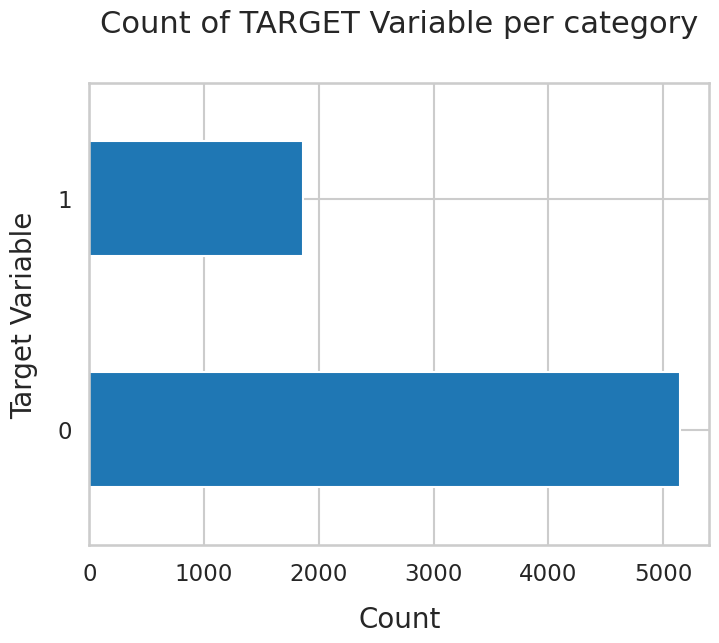

In [108]:
db['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [9]:
#percentage of churns and nonchurns
100*db['Churn'].value_counts()/len(db['Churn'])

Churn
0    73.413208
1    26.586792
Name: count, dtype: float64

In [10]:
#how much churn and non churn
db['Churn'].value_counts()

Churn
0    5147
1    1864
Name: count, dtype: int64

*this is highly imbalanced data 
ratio is like 73:27
*So we analyse the data with other features while taking the target values separately to get some insights.

In [11]:
# Get the max tenure
print(db['Tenure'].max())

72


In [12]:
# I need tenure to be in years 
# so grouped the tenure in bins of 12 monthS

In [13]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

db['Tenure_group'] = pd.cut(db.Tenure, range(1, 80, 12), right=False, labels=labels)

In [14]:
# checking how many years are there in each category


In [15]:
db['Tenure_group'].value_counts()

Tenure_group
1 - 12     2167
61 - 72    1402
13 - 24    1020
25 - 36     832
49 - 60     831
37 - 48     759
Name: count, dtype: int64

# datacleaning

# removing the unwanted coloumns

In [16]:
#drop column customerID and tenure
db.drop(columns= ['customerID','Tenure'], axis=1, inplace=True)
db.head()



,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2,29.85,29.85,0,1 - 12
1,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,3,56.95,1889.50,0,25 - 36
2,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,3,53.85,108.15,1,1 - 12
3,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,42.30,1840.75,0,37 - 48
4,0,0,0,0,1,0,2,0,0,0,0,0,0,0,1,2,70.70,151.65,1,1 - 12


In [17]:
#finding the count of churns respected to each and every coloum

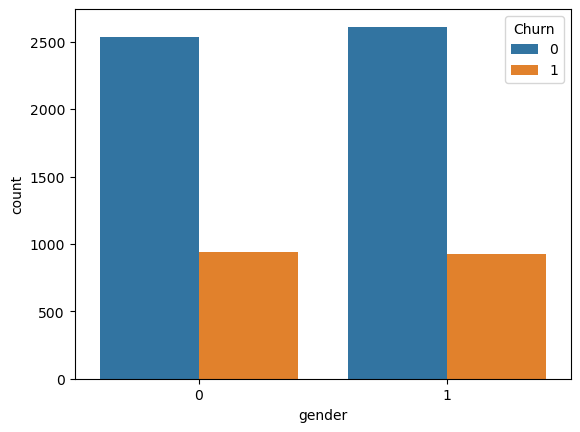

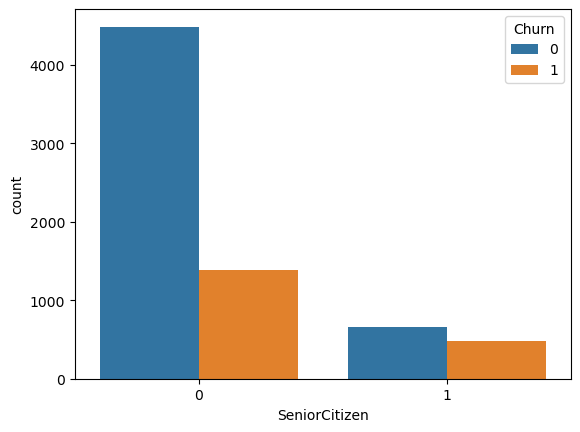

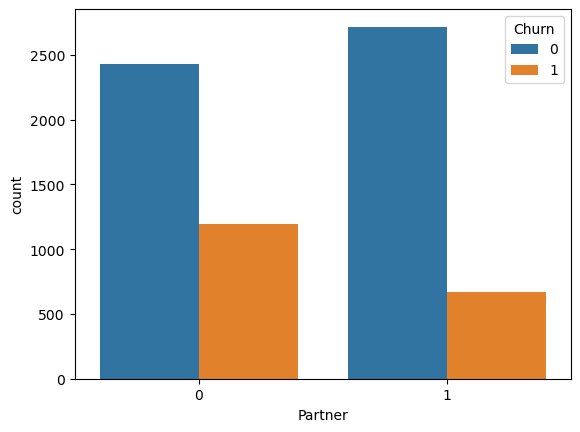

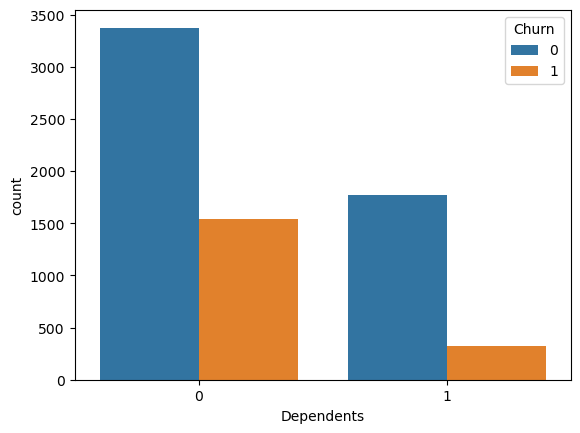

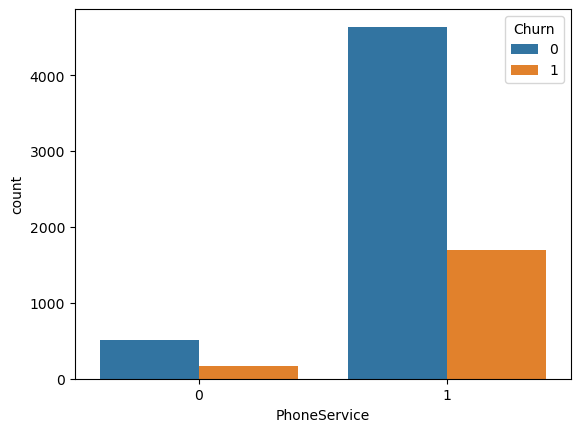

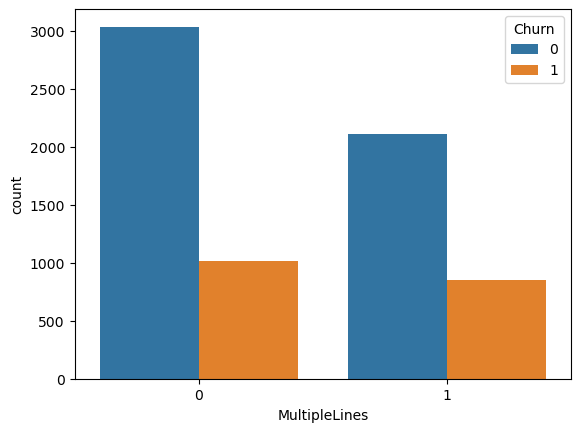

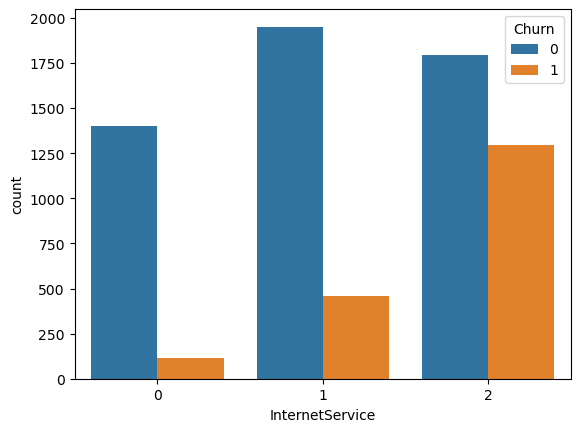

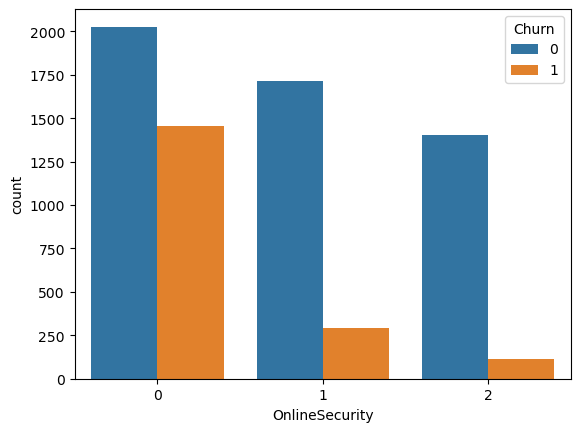

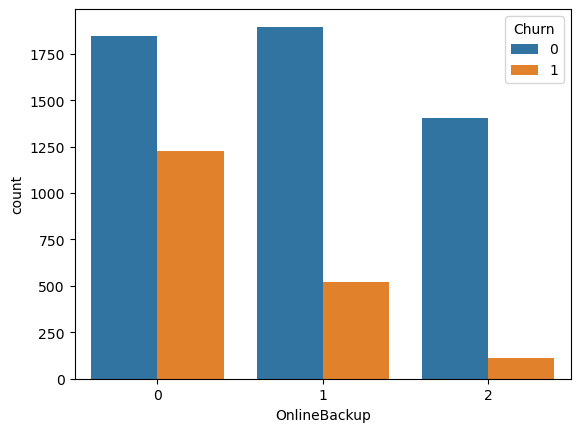

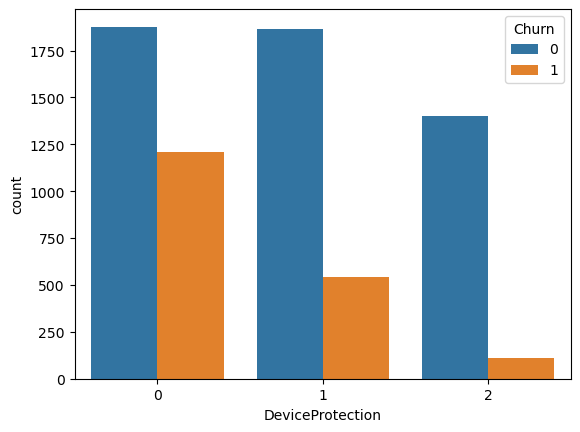

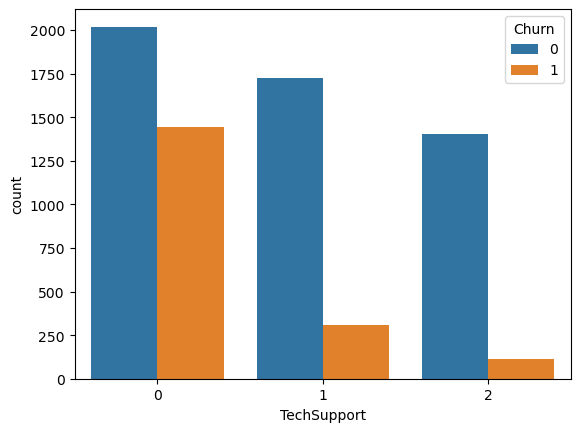

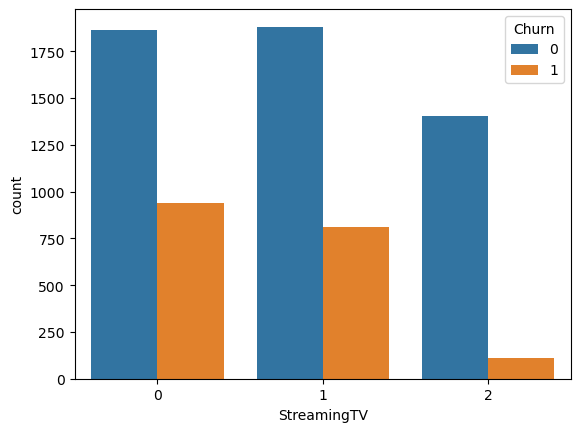

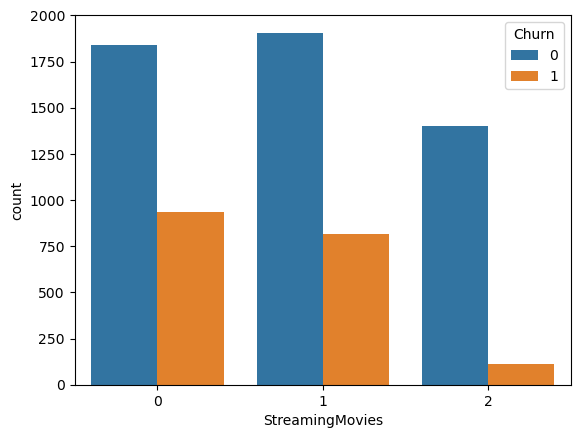

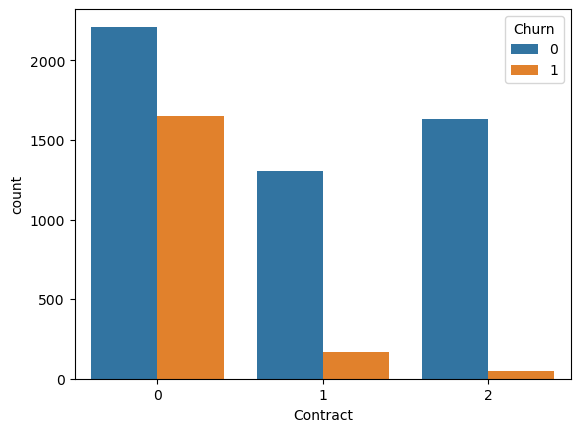

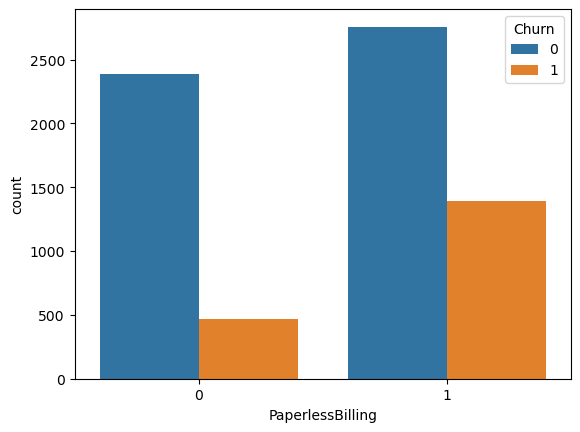

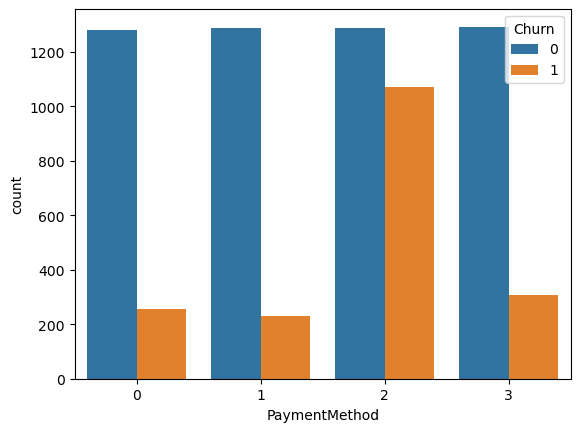

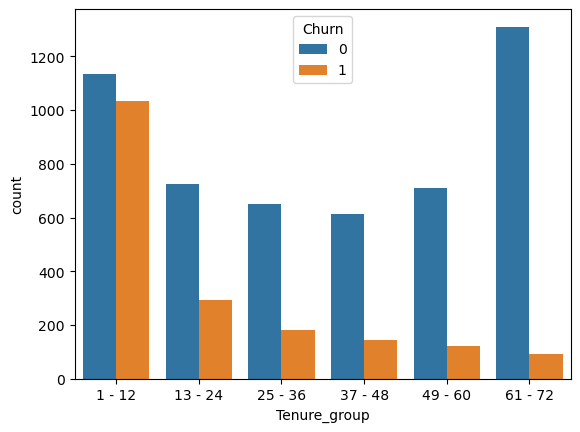

In [18]:
for i, predictor in enumerate(db.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=db, x=predictor, hue='Churn')

In [19]:
# Relationship between Monthly Charges and Total Charges


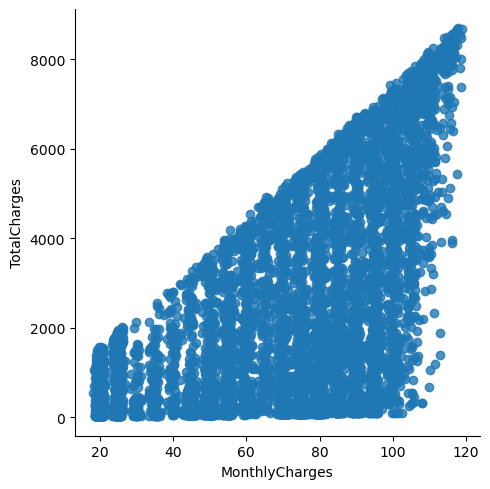

In [20]:


sns.lmplot(data=db, x='MonthlyCharges', y='TotalCharges', fit_reg=False)



 Total Charges increase as Monthly Charges increase - as expected.

#Churn by Monthly Charges and Total Charges

/tmp/ipykernel_11401/1561356060.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(db.MonthlyCharges[(db["Churn"] == 0) ],
/tmp/ipykernel_11401/1561356060.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(db.MonthlyCharges[(db["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

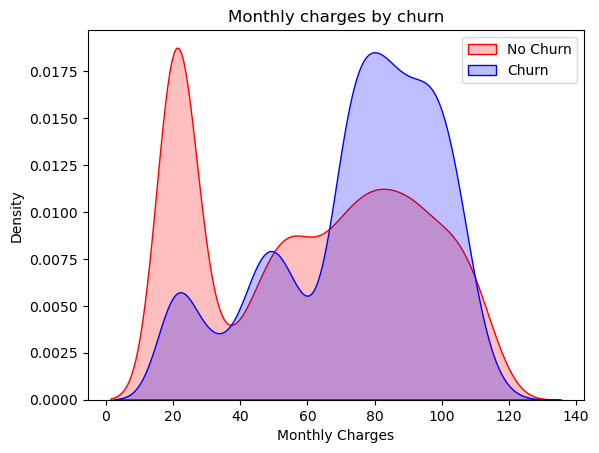

In [21]:
Mth = sns.kdeplot(db.MonthlyCharges[(db["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(db.MonthlyCharges[(db["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')


#Insight: Churn is high when Monthly Charges ar high

/tmp/ipykernel_11401/2327935470.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(db.TotalCharges[(db["Churn"] == 0) ],
/tmp/ipykernel_11401/2327935470.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(db.TotalCharges[(db["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

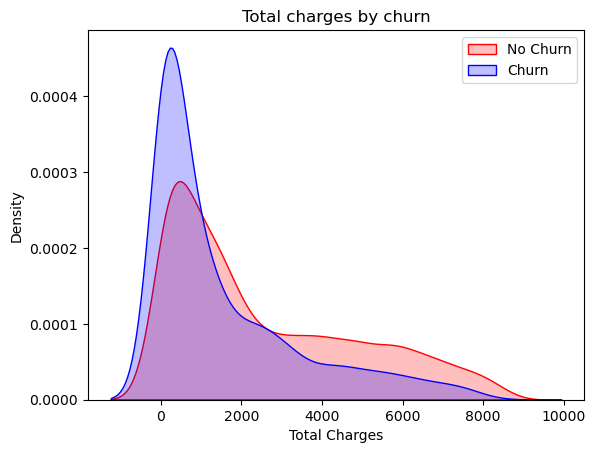

In [22]:


Tot = sns.kdeplot(db.TotalCharges[(db["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(db.TotalCharges[(db["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')


# 
#Surprising insight as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.



Build a corelation of all predictors with 'Churn' 

In [23]:
db = pd.get_dummies(db)
db.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group_1 - 12,Tenure_group_13 - 24,Tenure_group_25 - 36,Tenure_group_37 - 48,Tenure_group_49 - 60,Tenure_group_61 - 72
0,0,0,1,0,0,0,1,0,1,0,...,2,29.85,29.85,0,True,False,False,False,False,False
1,1,0,0,0,1,0,1,1,0,1,...,3,56.95,1889.50,0,False,False,True,False,False,False
2,1,0,0,0,1,0,1,1,1,0,...,3,53.85,108.15,1,True,False,False,False,False,False
3,1,0,0,0,0,0,1,1,0,1,...,0,42.30,1840.75,0,False,False,False,True,False,False
4,0,0,0,0,1,0,2,0,0,0,...,2,70.70,151.65,1,True,False,False,False,False,False


<AxesSubplot:>

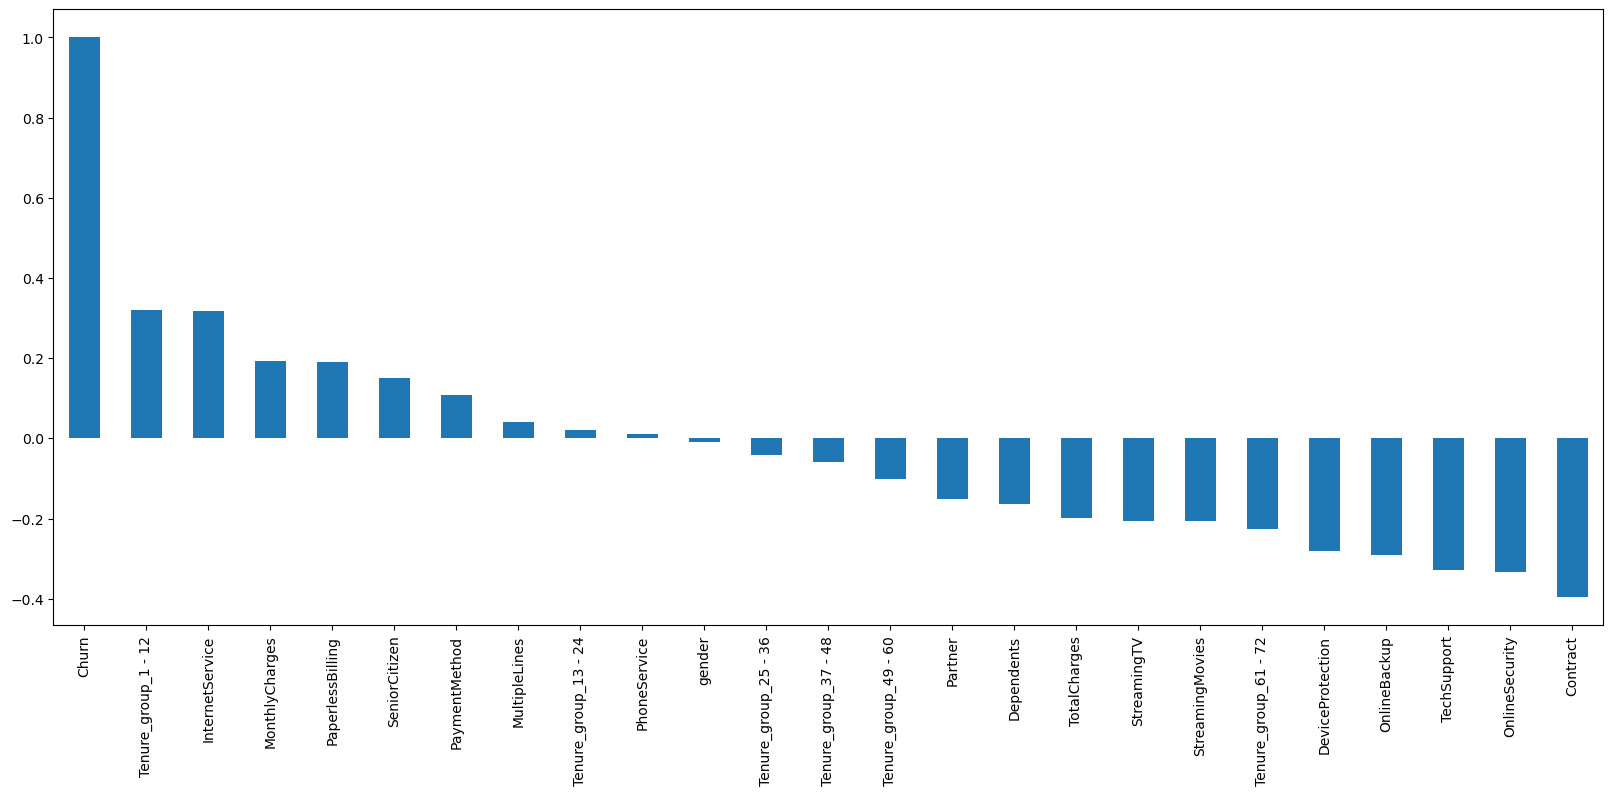

In [24]:


plt.figure(figsize=(20,8))
db.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')



#Derived Insight:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

#heatmap

<AxesSubplot:>

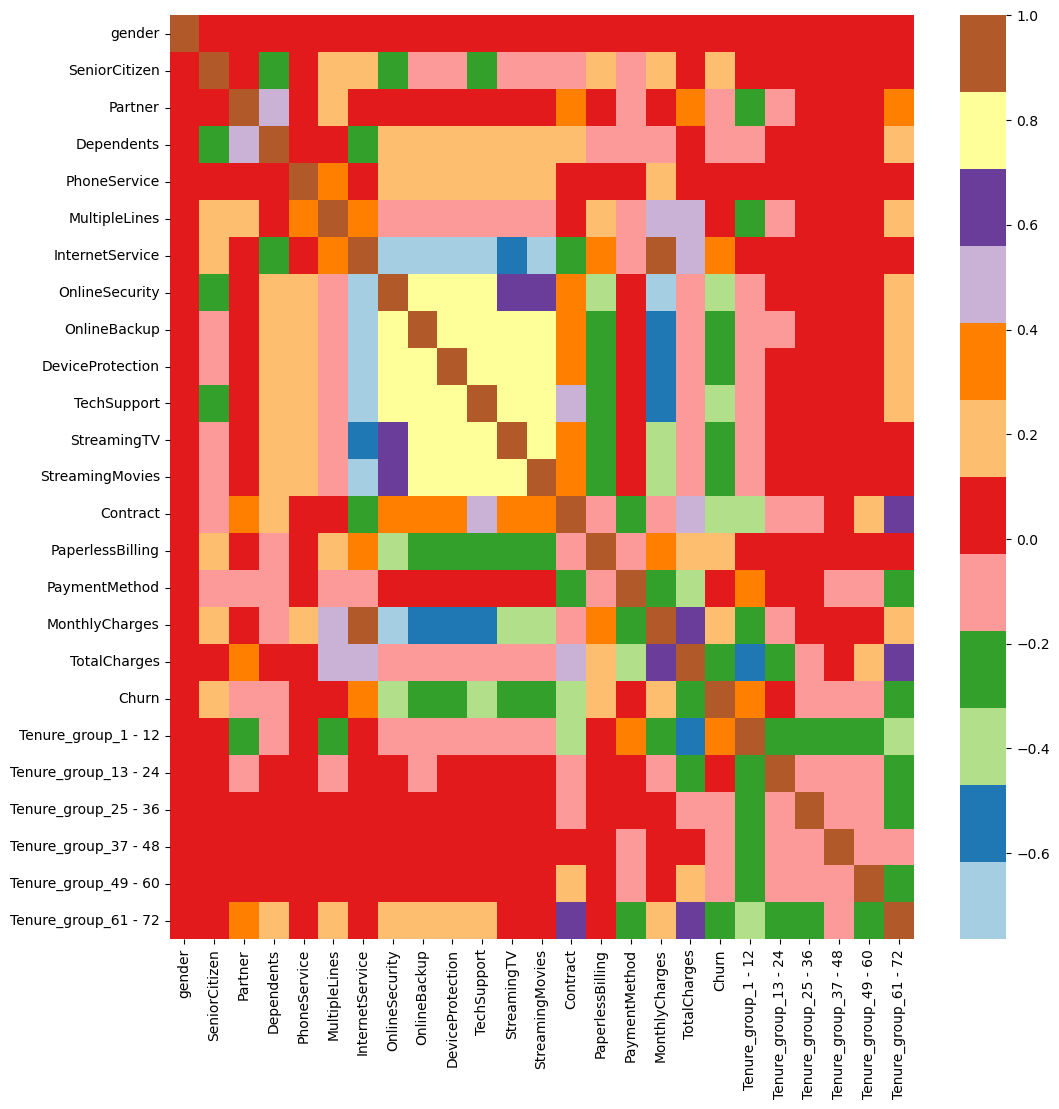

In [25]:


plt.figure(figsize=(12,12))
sns.heatmap(db.corr(), cmap="Paired")



 analysing 2 variables

In [26]:
new_df1_target0=db.loc[db["Churn"]==0]
new_df1_target1=db.loc[db["Churn"]==1]

In [27]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()





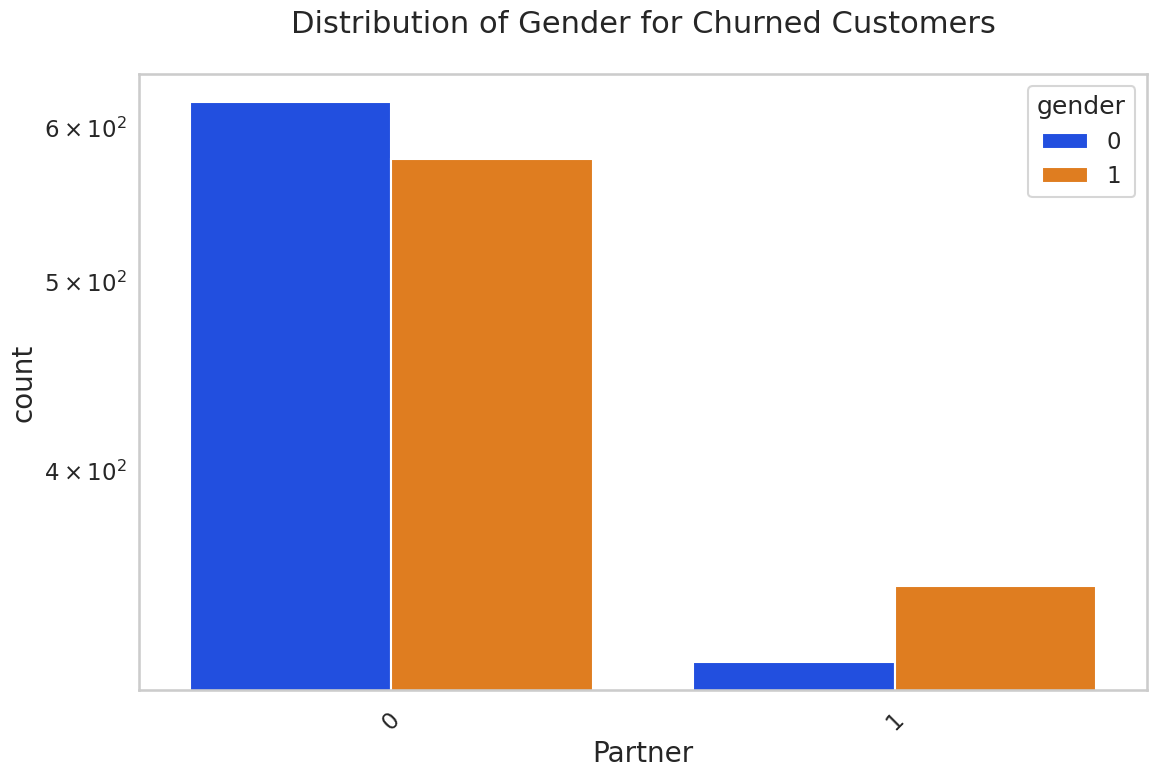

In [28]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

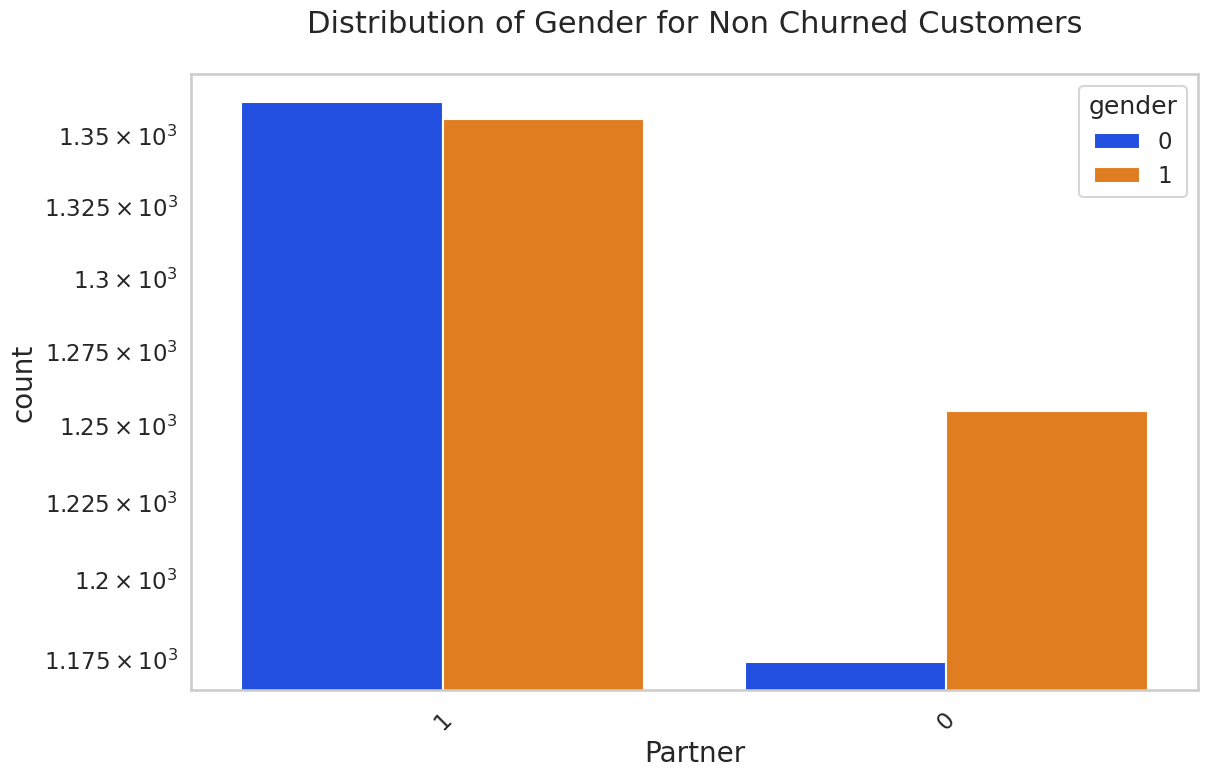

In [29]:


uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')



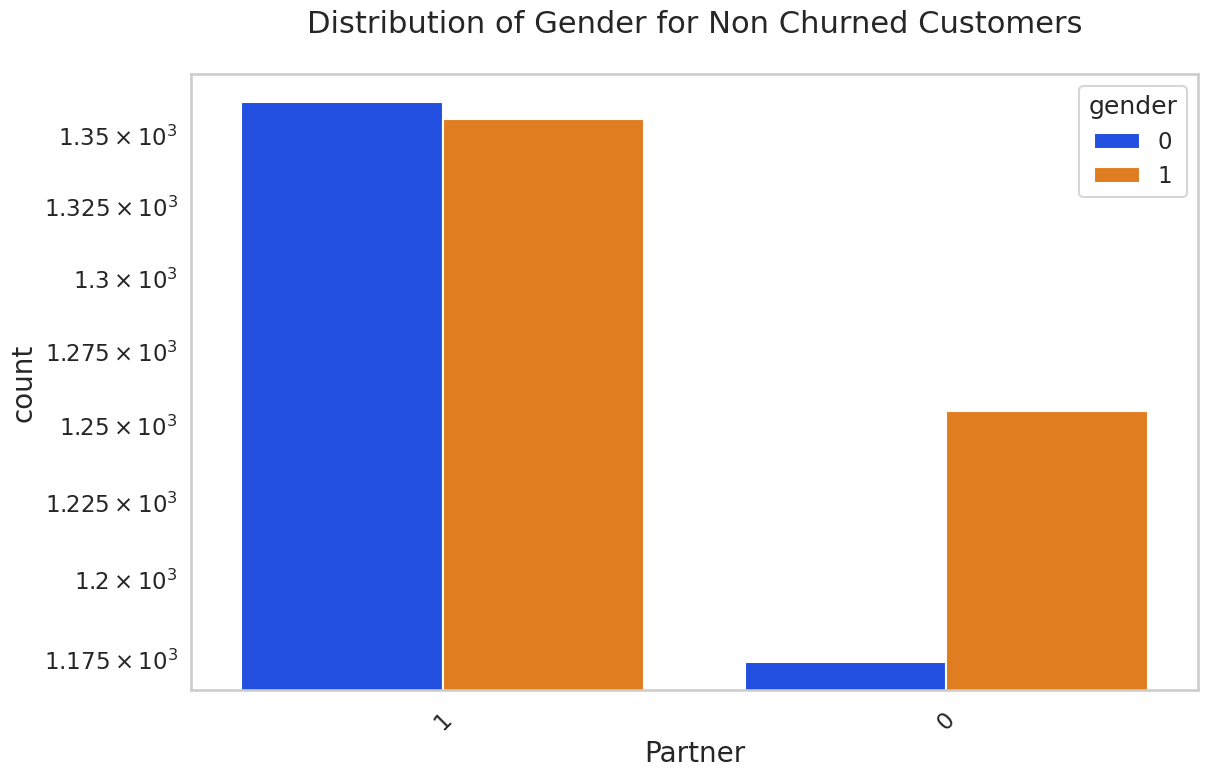

In [30]:


uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')



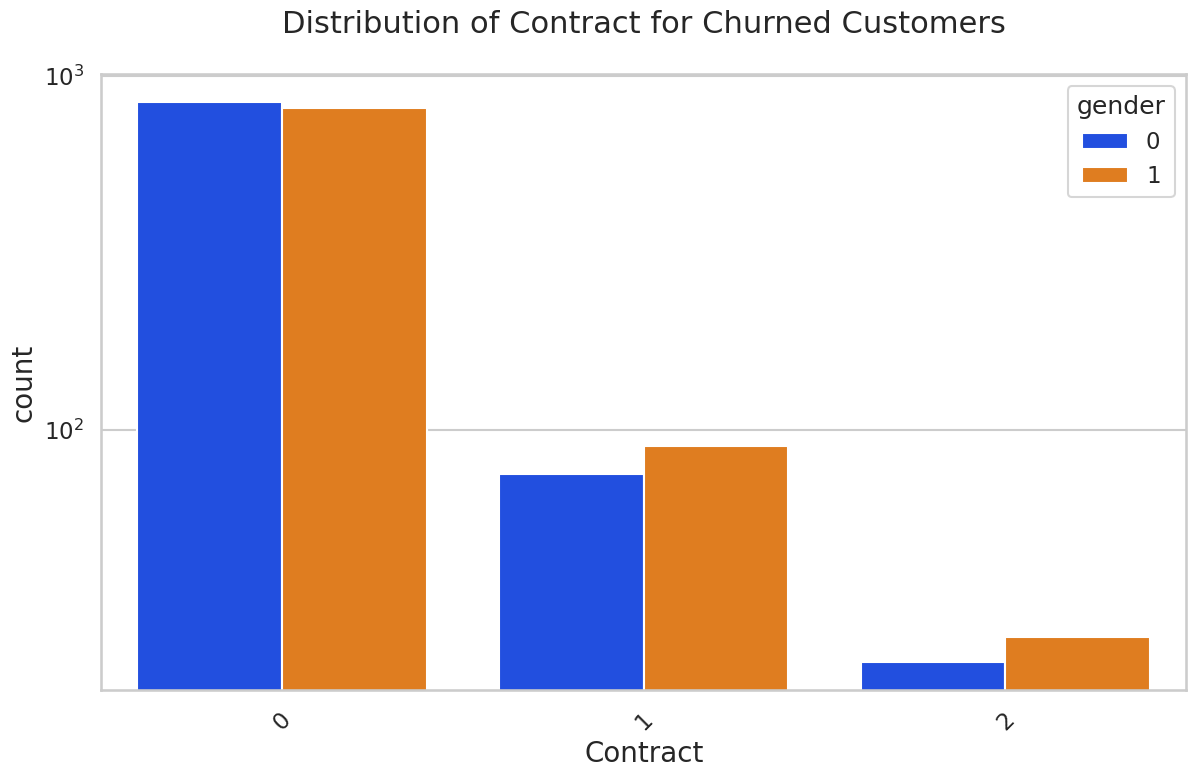

In [31]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

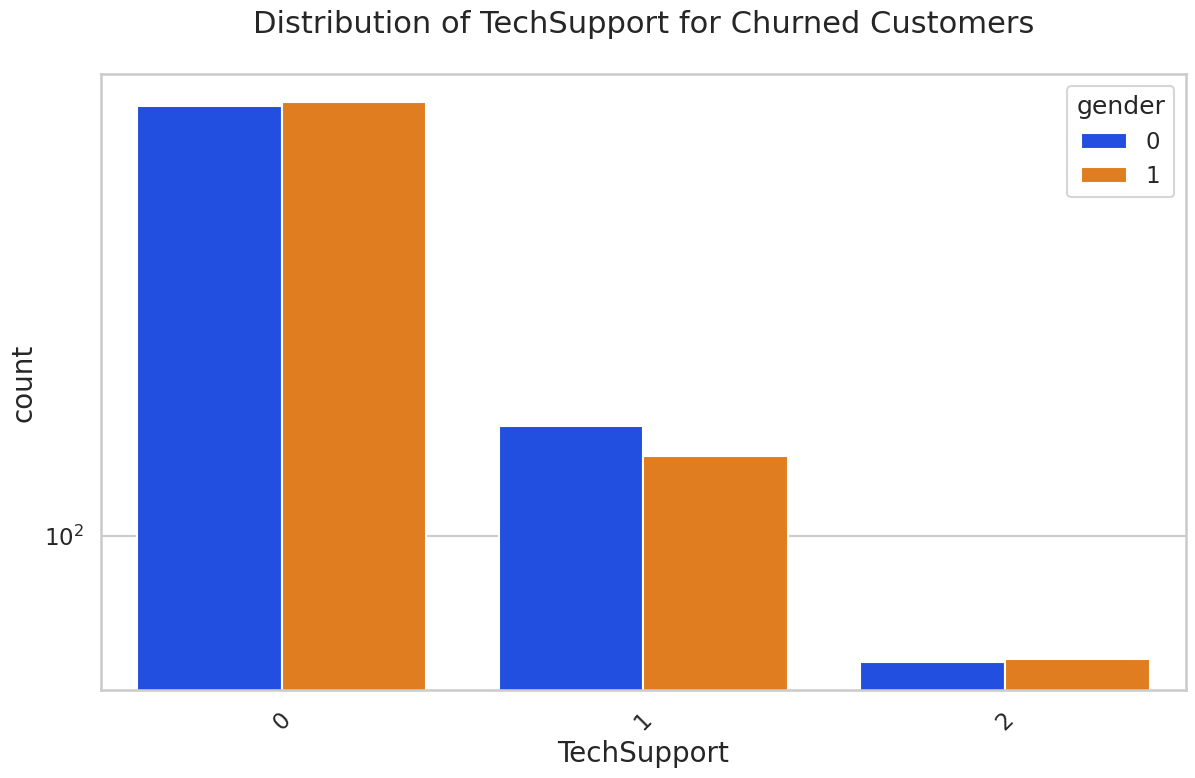

In [32]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')


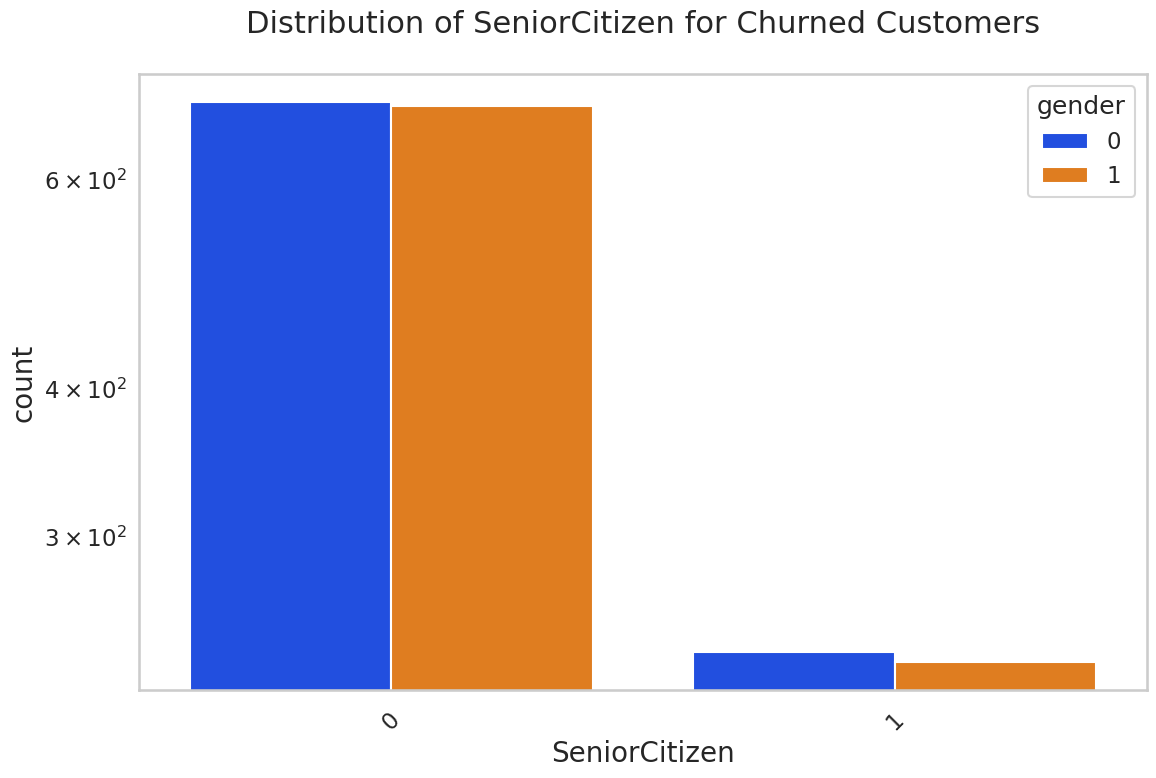

In [33]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# #CONCLUSION

These are some of the quick insights from this exercise:

1Electronic check medium are the highest churners
    
2Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
   
3No Online security, No Tech Support category are high churners
    
4Non senior Citizens are high churners


# making the model 


calling the needed librarys

In [58]:

import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN


#seprating the x  and y variable for testing the data


taking the churn coloumns as x factors and all the other as y variable

In [35]:
x=db.drop('Churn',axis=1)
x



,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Tenure_group_1 - 12,Tenure_group_13 - 24,Tenure_group_25 - 36,Tenure_group_37 - 48,Tenure_group_49 - 60,Tenure_group_61 - 72
0,0,0,1,0,0,0,1,0,1,0,...,1,2,29.85,29.85,True,False,False,False,False,False
1,1,0,0,0,1,0,1,1,0,1,...,0,3,56.95,1889.50,False,False,True,False,False,False
2,1,0,0,0,1,0,1,1,1,0,...,1,3,53.85,108.15,True,False,False,False,False,False
3,1,0,0,0,0,0,1,1,0,1,...,0,0,42.30,1840.75,False,False,False,True,False,False
4,0,0,0,0,1,0,2,0,0,0,...,1,2,70.70,151.65,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,0,0,0,0,1,0,0,2,2,2,...,0,0,20.65,1020.75,False,False,False,False,True,False
7007,0,0,1,1,1,1,2,0,1,1,...,1,1,103.20,7362.90,False,False,False,False,False,True
7008,0,0,1,1,0,0,1,1,0,0,...,1,2,29.60,346.45,True,False,False,False,False,False
7009,1,1,1,0,1,1,2,0,0,0,...,1,3,74.40,306.60,True,False,False,False,False,False


In [36]:

y=db['Churn']
y


0       0
1       0
2       1
3       0
4       1
       ..
7006    0
7007    0
7008    0
7009    1
7010    0
Name: Churn, Length: 7011, dtype: int64

#splitting the data into training and testing data

 and taking 80% of data for training and 20% for testing

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# decision tree classifier

In [38]:
# using decision tree classifier as a model

In [39]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [40]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [41]:
y_pred=model_dt.predict(x_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [42]:
model_dt.score(x_test,y_test)

0.7776193870277975


getting the result

In [43]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1022
           1       0.61      0.51      0.55       381

    accuracy                           0.78      1403
   macro avg       0.72      0.69      0.70      1403
weighted avg       0.77      0.78      0.77      1403



In [44]:
print (confusion_matrix(y_test,y_pred))

[[898 124]
 [188 193]]


#as the accuracy is not that much good 




iam going with the up sampling function for accurate result

In [45]:
sm = SMOTEENN()
x_reasampled,y_resampled=sm.fit_resample(x,y)

In [46]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_reasampled, y_resampled,test_size=0.2)

In [47]:


model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)



In [48]:


model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))



0.9310043668122271
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       522
           1       0.93      0.95      0.94       623

    accuracy                           0.93      1145
   macro avg       0.93      0.93      0.93      1145
weighted avg       0.93      0.93      0.93      1145



In [51]:
print(metrics.confusion_matrix(yr_test, yr_predict))


[[476  46]
 [ 33 590]]


In [87]:




# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train)
xr_test_pca = pca.transform(xr_test)
explained_variance = pca.explained_variance_ratio_






# randomforestclassifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [92]:



model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

model.fit(xr_train_pca,yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

yr_predict_pca = model.predict(xr_test_pca)

model_score_r_pca = model.score(xr_test_pca, yr_test)

print(model_score_r_pca)
print(metrics.classification_report(yr_test, yr_predict_pca))





0.7510917030567685
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       508
           1       0.75      0.82      0.79       637

    accuracy                           0.75      1145
   macro avg       0.75      0.74      0.74      1145
weighted avg       0.75      0.75      0.75      1145



 for getting better result iam goooing for up sampling method in random forest

In [82]:
sm = SMOTEENN()
x_reasampled,y_resampled=sm.fit_resample(x,y)

In [81]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_reasampled, y_resampled,test_size=0.2)

In [80]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)


In [79]:

model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))


0.9310043668122271
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       522
           1       0.93      0.95      0.94       623

    accuracy                           0.93      1145
   macro avg       0.93      0.93      0.93      1145
weighted avg       0.93      0.93      0.93      1145



In [96]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[225 283]
 [284 353]]
